In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 5
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 100

In [4]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [5]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [23]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    if(it == 0):
        print("Iteration:")
        print(it)
        print('\n')
        print(V)
    if(it == 1):
        print("Iteration:")
        print(it)
        print('\n')
        print(V)
    if(it == 10):
        print("Iteration:")
        print(it)
        print('\n')
        print(V)

    #print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

            

  0%|          | 3/10000 [00:00<07:13, 23.06it/s]

Iteration:
0


[[ 0.         -1.72803231 -2.26743172 -2.43601399 -2.47333027]
 [-1.72112988 -2.16395112 -2.37695979 -2.4379748  -2.4350962 ]
 [-2.26743404 -2.37535465 -2.42240995 -2.37125679 -2.26766452]
 [-2.43356435 -2.43582    -2.36965757 -2.16337764 -1.70885303]
 [-2.47271666 -2.43329795 -2.26365623 -1.71245607  0.        ]]
Iteration:
1


[[ 0.         -1.72803231 -2.26743172 -2.43601399 -2.47333027]
 [-1.72112988 -2.16395112 -2.37695979 -2.4379748  -2.4350962 ]
 [-2.2674599  -2.37535608 -2.42240995 -2.37125679 -2.26766452]
 [-2.43356435 -2.43579048 -2.36967064 -2.16337764 -1.70885303]
 [-2.47271666 -2.43324273 -2.26359446 -1.71239662  0.        ]]


  0%|          | 12/10000 [00:00<09:09, 18.19it/s]

Iteration:
10


[[ 0.         -1.72811677 -2.26746898 -2.43606922 -2.47331719]
 [-1.72118315 -2.16406988 -2.37704858 -2.43799535 -2.43514098]
 [-2.26741585 -2.37533235 -2.42239438 -2.37123241 -2.267635  ]
 [-2.43357079 -2.43574176 -2.36963883 -2.16331043 -1.70882482]
 [-2.47270648 -2.43322784 -2.26360869 -1.71247777  0.        ]]


100%|██████████| 10000/10000 [06:25<00:00, 25.97it/s]


In [24]:
V

array([[ 0.        , -1.72527066, -2.26566801, -2.43445018, -2.4734161 ],
       [-1.71516741, -2.16339789, -2.3760109 , -2.43679948, -2.43364564],
       [-2.26799259, -2.37519845, -2.42166487, -2.37220197, -2.26439284],
       [-2.43447745, -2.43515412, -2.36918991, -2.16367328, -1.71043737],
       [-2.47370859, -2.43413682, -2.26446656, -1.71137973,  0.        ]])

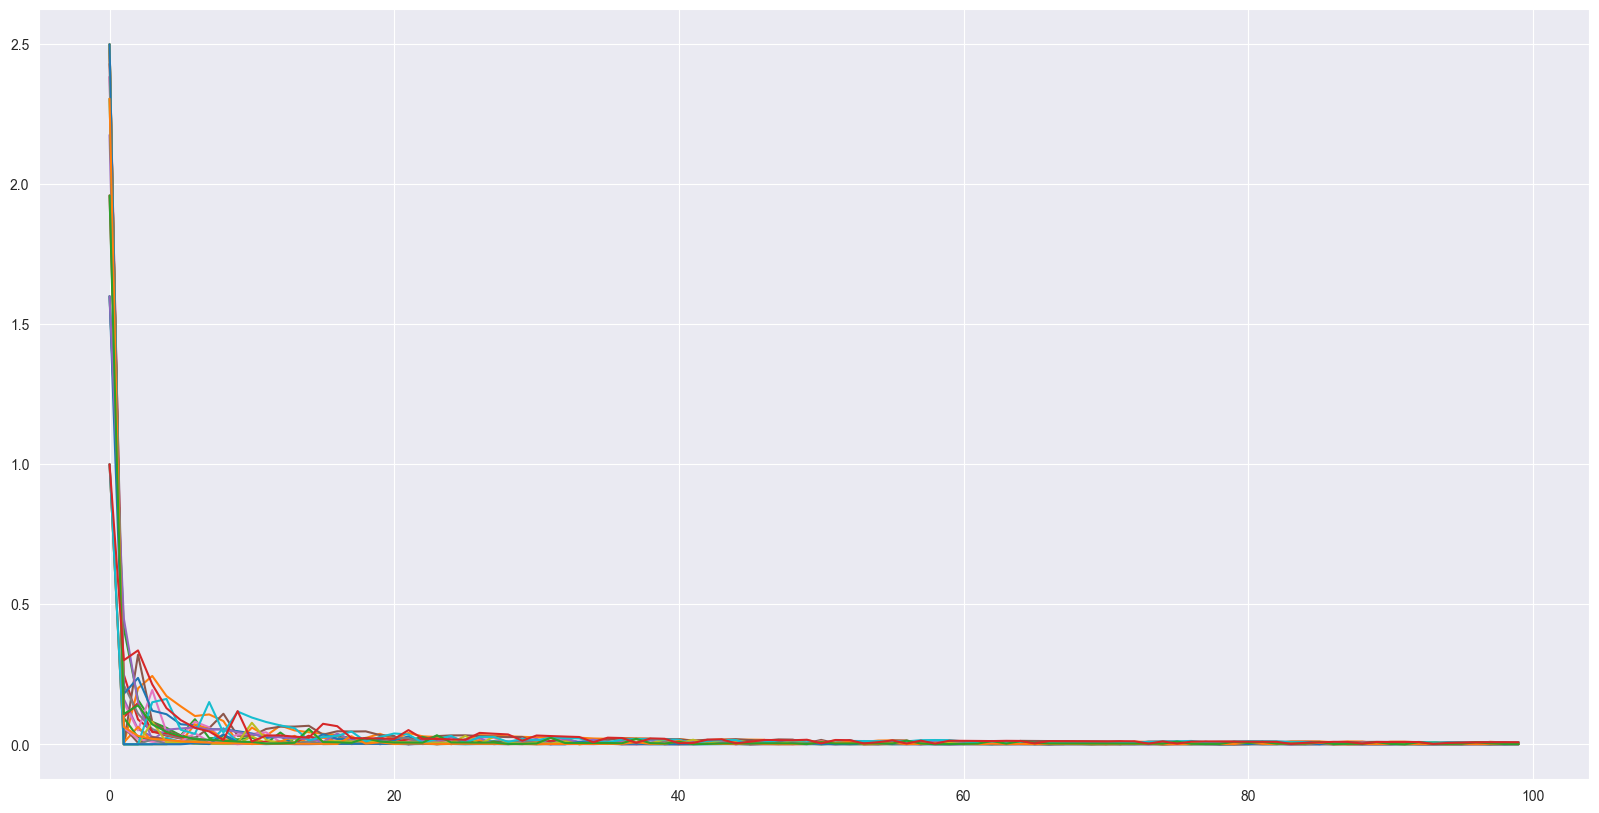

In [25]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:100] for x in deltas.values()]
for series in all_series:
    plt.plot(series)